In [49]:
import RNA
from Bio import SeqIO
import matplotlib.pyplot as plt

print("Loaded Python libraries.")

Loaded Python libraries.


In [73]:
def predict_mfe(rna_sequence):
    helix_length_threshold = 10
    
    # Create a fold compound object
    fc = RNA.fold_compound(rna_sequence)
    
    # Compute minimum free energy and corresponding secondary structure
    structure, mfe = fc.mfe()
    base_pairs = get_base_pairs(structure)
    helices = get_helices(base_pairs)

    # print(f"Structure: {structure}")
    # print(f"MFE: {mfe} kcal/mol")
    # print(f"Number of helices: {len(helices)}")
    
    reported_helices = [len(helix) for helix in helices if len(helix) >= helix_length_threshold]
    
    return structure, mfe, len(reported_helices)

In [75]:
def get_helices(base_pairs):
    if not base_pairs:
        return []

    helices = []
    current_helix = [base_pairs[0]]

    for i in range(1, len(base_pairs)):
        prev = base_pairs[i - 1]
        curr = base_pairs[i]

        # Check if it's part of the same helix (i.e., consecutive base pairs)
        if curr[0] == prev[0] + 1 and curr[1] == prev[1] - 1:
            current_helix.append(curr)
        else:
            helices.append(current_helix)
            current_helix = [curr]

    helices.append(current_helix)
    return helices

In [77]:
def get_base_pairs(dot_bracket):
    stack = []
    pairs = []
    for i, char in enumerate(dot_bracket):
        if char == '(':
            stack.append(i)
        elif char == ')':
            j = stack.pop()
            pairs.append((j, i))
    return sorted(pairs)

In [79]:
# Fasta file of 16S rRNA sequences that will be analyzed.
# State variable indicates if sequences are "real" or "mutated."
# If mutated it should include mutation rate e.g., "Mutated_0.1"

f_real = 'SILVA_138.2_SSURef_NR99_tax_silva_filtered.fasta'

f_mutated_10 = 'SILVA_138.2_SSURef_NR99_tax_silva_filtered.mutated_0.1.fasta'

f_mutated_1 = 'SILVA_138.2_SSURef_NR99_tax_silva_filtered.mutated_0.01.fasta'

In [89]:
num_seqs_to_process = 100

results_real = []
results_mutated_10 = []
results_mutated_1 = []

helices_real = []
helices_mutated_10 = []
helices_mutated_1 = []

for h,i in enumerate(SeqIO.parse(f_real,'fasta')):
    id,d,s,L = str(i.id),str(i.description),str(i.seq),len(i.seq)
    structure, mfe, helices = predict_mfe(s)
    helices_real.append(helices)
    results_real.append(mfe)
    print(f"Real {h}...", end = '\r')
    if h == num_seqs_to_process:
        break

print("Finished processing real seqs!")

for h,i in enumerate(SeqIO.parse(f_mutated_10,'fasta')):
    id,d,s,L = str(i.id),str(i.description),str(i.seq),len(i.seq)
    structure, mfe, helices = predict_mfe(s)
    helices_mutated_10.append(helices)
    results_mutated_10.append(mfe)
    print(f"Mutated 0.1 {h}...", end = '\r')
    if h == num_seqs_to_process:
        break

print("Finished mutated seqs 0.1!")

for h,i in enumerate(SeqIO.parse(f_mutated_1,'fasta')):
    id,d,s,L = str(i.id),str(i.description),str(i.seq),len(i.seq)
    structure, mfe, helices = predict_mfe(s)
    helices_mutated_1.append(helices)
    results_mutated_1.append(mfe)
    print(f"Mutated 0.01 {h}...", end = '\r')
    if h == num_seqs_to_process:
        break

print("Finished mutated seqs 0.01!")

Finished processing real seqs!
Finished mutated seqs 0.1!
Finished mutated seqs 0.01!


/var/folders/kt/6gwgr2_94396xjn5f2hk_3940000gn/T/ipykernel_87401/2229996685.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_real,results_mutated_10,results_mutated_1],labels = ["Real","Mutated_0.1","Mutated_0.01"])


{'whiskers': [<matplotlib.lines.Line2D at 0x12b669c70>,
 'caps': [<matplotlib.lines.Line2D at 0x12b66a1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b669a00>,
 'medians': [<matplotlib.lines.Line2D at 0x12b66a660>,
 'fliers': [<matplotlib.lines.Line2D at 0x12b66a8d0>,
 'means': []}

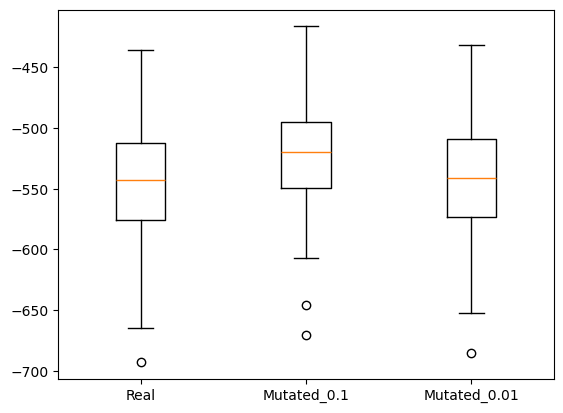

In [91]:
plt.boxplot([results_real,results_mutated_10,results_mutated_1],labels = ["Real","Mutated_0.1","Mutated_0.01"])

/var/folders/kt/6gwgr2_94396xjn5f2hk_3940000gn/T/ipykernel_87401/3499524183.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([helices_real,helices_mutated_10,helices_mutated_1],labels = ["Real","Mutated_0.1","Mutated_0.01"])


{'whiskers': [<matplotlib.lines.Line2D at 0x12b6d36e0>,
 'caps': [<matplotlib.lines.Line2D at 0x12b6d3c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b6d3410>,
 'medians': [<matplotlib.lines.Line2D at 0x12b70c0e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12b70c380>,
 'means': []}

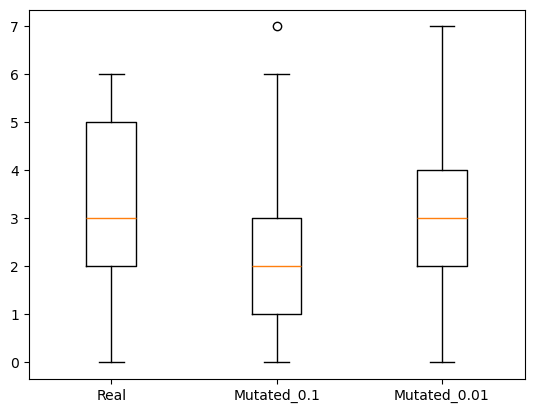

In [93]:
plt.boxplot([helices_real,helices_mutated_10,helices_mutated_1],labels = ["Real","Mutated_0.1","Mutated_0.01"])